In [1]:
path='G:/Shared drives/BeStarsMiMeS/ScienceFiles/' #Patrick's google file stream path

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import specpolFlow as pol

from matplotlib.backends.backend_pdf import PdfPages
import pyRaven as rav


In [3]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData2=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations2=pd.read_csv(url)


sheet_id = '1Hle6DgGcse92VdarqZma1nje5xYwlJwnAkMStMba1xU'
sheet_name = 'Bstars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData3=pd.read_csv(url)

In [4]:
Teffs=np.array([])
vsinis=np.array([])
for i in range(StarData2['T'].size):
    if StarData2['pyRavenFlag'][i]==1.0 or StarData2['pyRavenFlag'][i]==2.0:
        Teffs=np.append(Teffs,StarData2['T'][i])
        vsinis=np.append(vsinis,StarData2['vsini-estimate'][i])
    if StarData2['Name'][i]=='hd90966':
        Teffs=np.append(Teffs,StarData2['T'][i])
        vsinis=np.append(vsinis,StarData2['Adopted-vsini'][i])

In [5]:
stars=StarData3.groupby("HD Num",as_index=False).median()

Bstar_vsini=np.array([])
Bstar_T=np.array([])
for i in range(stars['HD Num'].size):
    Bstar_vsini = np.append(Bstar_vsini,stars['vsini'][i])
    Bstar_T = np.append(Bstar_T,stars['Masktemp'][i])

C:\Users\pjsta\AppData\Local\Temp\ipykernel_114536\401633495.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars=StarData3.groupby("HD Num",as_index=False).median()


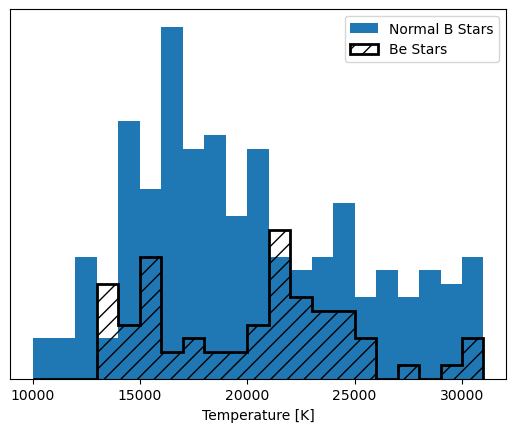

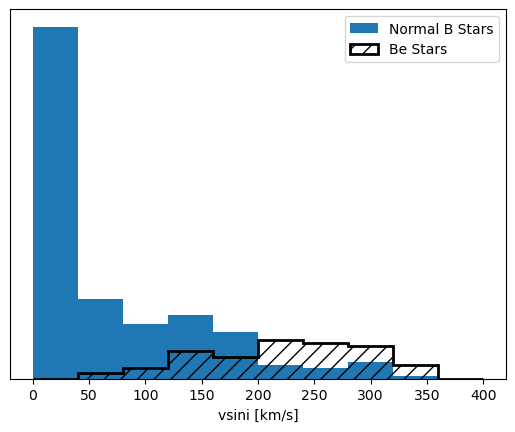

In [7]:
plt.hist(Bstar_T,bins=np.arange(10000,32000,1000),linewidth=2,label='Normal B Stars')
plt.hist(Teffs,bins=np.arange(10000,32000,1000),histtype='step',color='k',hatch='//',linewidth=2,label='Be Stars')
plt.xlabel(r'Temperature [K]')
plt.yticks([])
plt.legend()
plt.show()


plt.hist(Bstar_vsini,bins=np.arange(0,440,40),linewidth=2,label='Normal B Stars')
plt.hist(vsinis,bins=np.arange(0,440,40),histtype='step',color='k',hatch='//',linewidth=2,label='Be Stars')
plt.xlabel(r'vsini [km/s]')
plt.yticks([])
plt.legend()
plt.show()

In [7]:
np.histogram(Bstar_vsini,bins=np.arange(0,440,40))

(array([128,  29,  20,  23,  17,   5,   4,   6,   1,   0], dtype=int64),
 array([  0,  40,  80, 120, 160, 200, 240, 280, 320, 360, 400]))

In [104]:
from astroquery.simbad import Simbad
Simbad.add_votable_fields('sptype')
Simbad.add_votable_fields('id(HD)')
Simbad.add_votable_fields('flux(V)')
name=[]
sptype=[]
vmag=[]
for i in range(StarData2['T'].size):
    star=StarData2['Name'][i]
    if StarData2['pyRavenFlag'][i]==1.0 or StarData2['pyRavenFlag'][i]==2.0:
        result_table = Simbad.query_object(star)
        name.append(result_table['ID_HD'][0])
        sptype.append(result_table['SP_TYPE'][0])
        vmag.append(result_table['FLUX_V'][0])
    if StarData2['Name'][i]=='hd90966':
        result_table = Simbad.query_object(star)
        name.append(result_table['ID_HD'][0])
        sptype.append(result_table['SP_TYPE'][0])
        vmag.append(result_table['FLUX_V'][0])

Simbad.reset_votable_fields()

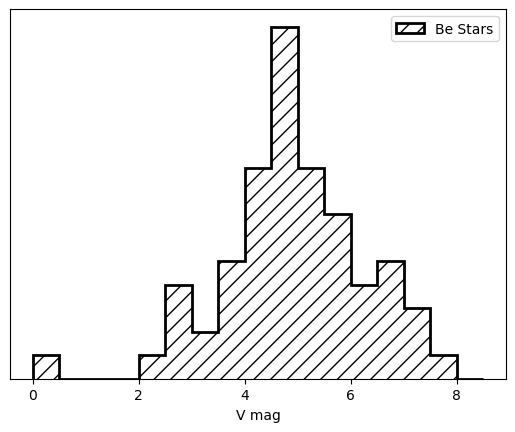

In [114]:

plt.hist(np.array(vmag),bins=np.arange(0,9,0.5),histtype='step',color='k',hatch='//',linewidth=2,label='Be Stars')
plt.xlabel(r'V mag')
plt.yticks([])
plt.legend()
plt.show()

(<Figure size 1000x1000 with 3 Axes>,
 array([<Axes: ylabel='V'>, <Axes: ylabel='N1'>,
        <Axes: xlabel='Velocity (km/s)', ylabel='I'>], dtype=object))

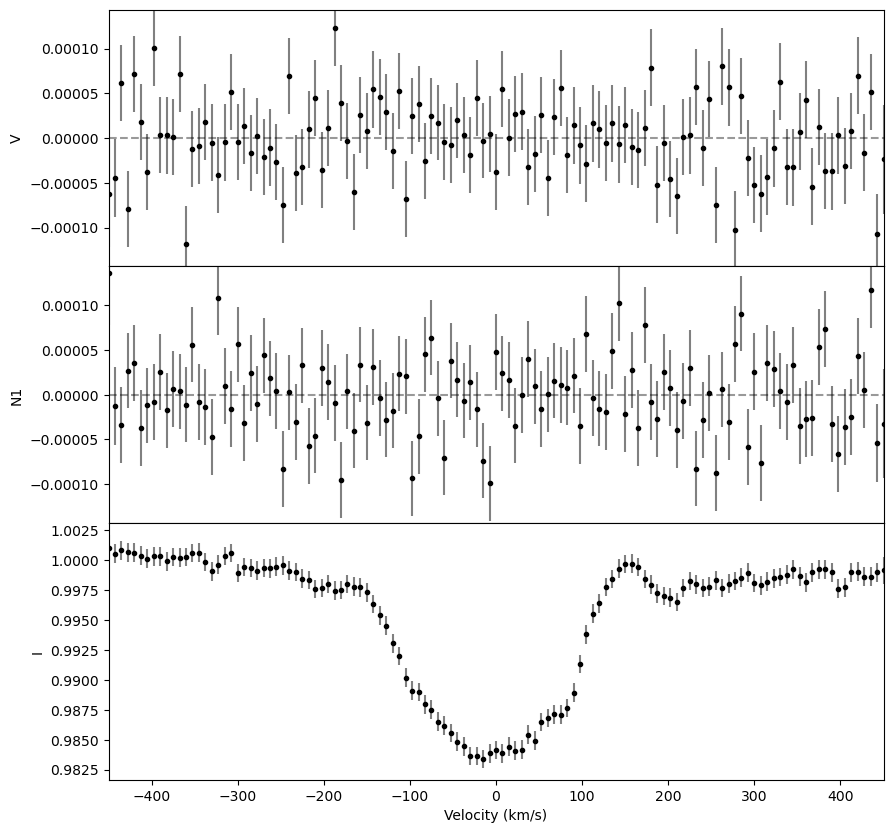

In [123]:
star=StarData2['Name'][6]
star="hd148184"
i=0
file = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path,'normalized_CleanAsif+tellClean',star,i+1)
lsd = pol.read_lsd(file)

lsd.plot()

## Evolution tracks

In [32]:
from astroquery.simbad import Simbad
Simbad.add_votable_fields('sptype')
Simbad.add_votable_fields('id(HD)')
Simbad.add_votable_fields('flux(V)')
Simbad.add_votable_fields('fe_h')
name=[]
sptype=[]
vmag=[]
Teff=[]
logg=[]
for i in range(StarData2['T'].size):
    star=StarData2['Name'][i]
    if StarData2['pyRavenFlag'][i]==1.0 or StarData2['pyRavenFlag'][i]==2.0:
        result_table = Simbad.query_object(star)
        name.append(result_table['ID_HD'][0])
        sptype.append(result_table['SP_TYPE'][0])
        vmag.append(result_table['FLUX_V'][0])
        if result_table['Fe_H_Teff'][0]==0:
            Teff.append(StarData2['T'][i])
        if np.isnan(float(result_table['Fe_H_log_g'][0])):
            logg.append(StarData2['log(g)'][i])
        if result_table['Fe_H_Teff'][0]!=0:
            Teff.append(result_table['Fe_H_Teff'][0])
        if not np.isnan(float(result_table['Fe_H_log_g'][0])):
            logg.append(result_table['Fe_H_log_g'][0])
    if StarData2['Name'][i]=='hd90966':
        result_table = Simbad.query_object(star)
        name.append(result_table['ID_HD'][0])
        sptype.append(result_table['SP_TYPE'][0])
        vmag.append(result_table['FLUX_V'][0])
        if result_table['Fe_H_Teff'][0]==0:
            Teff.append(StarData2['T'][i])
        if np.isnan(float(result_table['Fe_H_log_g'][0])):
            logg.append(StarData2['log(g)'][i])
        if result_table['Fe_H_Teff'][0]!=0:
            Teff.append(result_table['Fe_H_Teff'][0])
        if not np.isnan(float(result_table['Fe_H_log_g'][0])):
            logg.append(result_table['Fe_H_log_g'][0])

Simbad.reset_votable_fields()

C:\Users\pjsta\AppData\Local\Temp\ipykernel_31592\2338659942.py:20: UserWarning: Warning: converting a masked element to nan.
  if np.isnan(float(result_table['Fe_H_log_g'][0])):
C:\Users\pjsta\AppData\Local\Temp\ipykernel_31592\2338659942.py:24: UserWarning: Warning: converting a masked element to nan.
  if not np.isnan(float(result_table['Fe_H_log_g'][0])):
C:\Users\pjsta\AppData\Local\Temp\ipykernel_31592\2338659942.py:20: UserWarning: Warning: converting a masked element to nan.
  if np.isnan(float(result_table['Fe_H_log_g'][0])):
C:\Users\pjsta\AppData\Local\Temp\ipykernel_31592\2338659942.py:24: UserWarning: Warning: converting a masked element to nan.
  if not np.isnan(float(result_table['Fe_H_log_g'][0])):
C:\Users\pjsta\AppData\Local\Temp\ipykernel_31592\2338659942.py:20: UserWarning: Warning: converting a masked element to nan.
  if np.isnan(float(result_table['Fe_H_log_g'][0])):
C:\Users\pjsta\AppData\Local\Temp\ipykernel_31592\2338659942.py:24: UserWarning: Warning: convert

In [40]:
import os
path2 = 'G:/Shared drives/ResearchGroupResources-Files/ReferenceMaterial/BrottEvolutionModels/GAL' # path to models
track_list = [] # list will contain all track files
track_name = [] # list will contain all track names (to be used as dict keys)

for (root, dirs, file) in os.walk(path2):
    for f in file:
        if '.dat' in f: # only reading in .dat files
            track_list.append(f)

            file_name = f.split(".")[0]            # making track_name more python friendly by getting rid of '.'
            file_name = file_name.replace("-","_") # making track_name more python friendly by replacing '-'
            track_name.append(file_name) 

In [41]:
GAL = {} # initializing an empty dictionary 
  
for j in range(len(track_name)): # looping over track_name to populate dictionary 

    a = pd.read_csv(path2 + '/' + track_list[j], sep = '\s+', header = 0, engine='python')
    b = a.to_dict('list')
    
    if len(list(b)) != 82: # evolution model files should contain 82 columns, if there are more or less, check that the file is
        print(f'{track_list[j]} is configured wrong' ) # configured correctly (ie units in the column headers are not seperated by a ' ')

    GAL[track_name[j]] = b

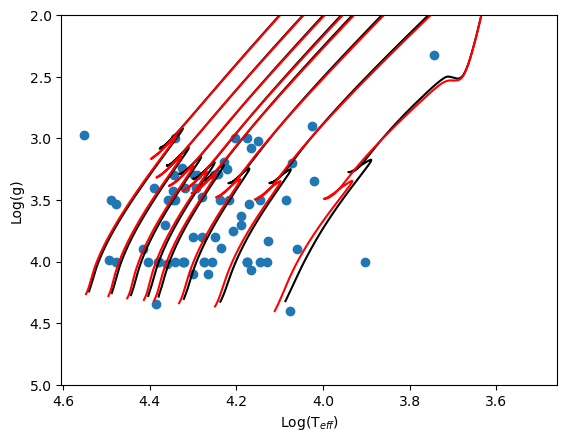

In [73]:

from matplotlib.ticker import AutoMinorLocator, MultipleLocator
fig, axs = plt.subplots()

axs.plot(np.log10(GAL['f3_250']['3:Teff[K]']), GAL['f3_250']['7:logg'], c = 'k')
axs.plot(np.log10(GAL['f5_233']['3:Teff[K]']), GAL['f5_233']['7:logg'], c = 'k')
axs.plot(np.log10(GAL['f7_229']['3:Teff[K]']), GAL['f7_229']['7:logg'], c = 'k')
axs.plot(np.log10(GAL['f9_226']['3:Teff[K]']), GAL['f9_226']['7:logg'], c = 'k')
axs.plot(np.log10(GAL['f10_226']['3:Teff[K]']), GAL['f10_226']['7:logg'], c = 'k')
axs.plot(np.log10(GAL['f12_225']['3:Teff[K]']), GAL['f12_225']['7:logg'], c = 'k')
axs.plot(np.log10(GAL['f15_223']['3:Teff[K]']), GAL['f15_223']['7:logg'], c = 'k')
axs.plot(np.log10(GAL['f20_220']['3:Teff[K]']), GAL['f20_220']['7:logg'], c = 'k')

axs.plot(np.log10(GAL['f3_0']['3:Teff[K]']), GAL['f3_0']['7:logg'], c = 'r')
axs.plot(np.log10(GAL['f5_0']['3:Teff[K]']), GAL['f5_0']['7:logg'], c = 'r')
axs.plot(np.log10(GAL['f7_0']['3:Teff[K]']), GAL['f7_0']['7:logg'], c = 'r')
axs.plot(np.log10(GAL['f9_0']['3:Teff[K]']), GAL['f9_0']['7:logg'], c = 'r')
axs.plot(np.log10(GAL['f10_0']['3:Teff[K]']), GAL['f10_0']['7:logg'], c = 'r')
axs.plot(np.log10(GAL['f12_0']['3:Teff[K]']), GAL['f12_0']['7:logg'], c = 'r')
axs.plot(np.log10(GAL['f15_0']['3:Teff[K]']), GAL['f15_0']['7:logg'], c = 'r')
axs.plot(np.log10(GAL['f20_0']['3:Teff[K]']), GAL['f20_0']['7:logg'], c = 'r')

#axs.xaxis.set_minor_locator(MultipleLocator(0.05))
#axs.yaxis.set_minor_locator(MultipleLocator(0.25))

axs.scatter(np.log10(np.array(Teff)),logg)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel(r'Log(T$_{eff}) $')
plt.ylabel('Log(g)')
plt.ylim(5,2)

plt.show()

In [71]:
Teff[32]

11900